### First question ###

The hierarchy I planned:

General Neuron
    firing_rate
    Activate

    Sensory Neuron
        Photoreceptor
            receptor_type
        Mechanoreceptor
            
    Motor Neuron
        target_muscle
        Control Muscle

        Alpha Motor Neuron
            target_muscle
            Skeletal Muscle Control
            Response Specific to Skeletal Muscle

        Gamma Motor Neuron
            target_muscle
            Muscle Spindle Control
            Unique Control Mechanism


In [ ]:
from graphviz import Digraph
# Found a library that can plots the hierarchy automatically. Again, for good pracice.  
# Providing the .png that was generated.

# First in the hierarchy
class Neuron():
    def __init__(self, firing_range) -> None:
        self.firing_range = firing_range   
    def activate(self):
        return None
  
# Second in the hierarchy, inheriting 'Neuron'
class Sensory(Neuron):
    def __init__(self, firing_range, receptor_type) -> None:
        super().__init__(firing_range)
        self.receptor_type = receptor_type
    def sense_stimulus(self):
        return None
    
# Third in the hierarchy, inheriting 'Sensory' and 'Neuron'    
class Photoreceptor(Sensory):
    def __init__(self, firing_range, receptor_type, light_detection) -> None:
        super().__init__(firing_range, receptor_type)
        self.light_detection = light_detection
    def unique_response_to_light(self):
        return None
    
# Third in the hierarchy, inheriting 'Sensory' and 'Neuron'    
class Mechanoreceptor(Sensory):
    def __init__(self, firing_range, receptor_type, pressure_detection) -> None:
        super().__init__(firing_range, receptor_type)
        self.pressure_detection = pressure_detection
    def unique_response_to_pressure(self):
        return None


##### Finish ^ first #####

class Motor(Neuron):
    def __init__(self) -> None:
        super().__init__()

class Alpha_Motor(Motor):
    def __init__(self) -> None:
        super().__init__()

class Beta_Motor(Motor):
    def __init__(self) -> None:
        super().__init__()

classes = [Neuron, Sensory, Photoreceptor, Mechanoreceptor, Motor, Alpha_Motor, Beta_Motor]
for cls in classes:
    dot.node(cls.__name__)  # Add class nodes
    for base in cls.__bases__:
        if base.__name__ != "object":  # Skip the base 'object' class
            dot.edge(base.__name__, cls.__name__)  # Add edges for inheritance

# dot = Digraph(comment="OOP Hierarchy")
# dot.attr(rankdir="TB") # Plots Top to Bottom hierarchy arrows.
# dot.render("class_hierarchy", format="png", cleanup=True) # Render the graph
# print("Class hierarchy saved to class_hierarchy.png")

Class hierarchy saved to class_hierarchy.png


### Second question ###

### Q1 ###


Plan:


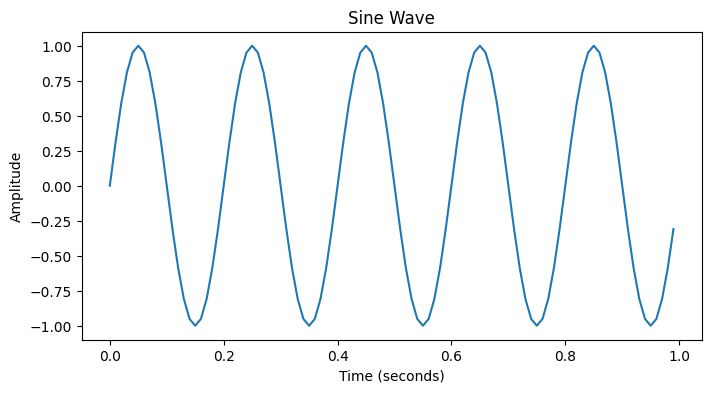

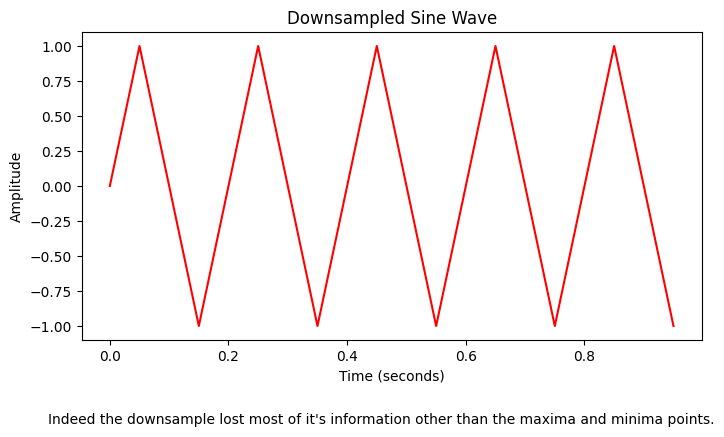

Original sine_wave np.array len: 100
Length of new downsampled sine wave: 20
Ratio between arrays: 20.0 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values given in the instructions:
duration = 1 #sec
sampling_rate = 1 / 0.01 #Hz
frequency = 5 #Hz

time_value = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave.
sine_wave = np.sin(2 * np.pi * frequency * time_value)

# test plot the sine wave - not mandatory, but for good practice.
plt.figure(figsize=(8, 4))
plt.plot(time_value, sine_wave, label="Original Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Sine Wave")
plt.show()


def sine_down_sample(sine_wave, time_value):
    ### A function to downsample a sine wave array using NumPy ###
    ### Input: sine wave np.array and time value used to plot the same sine file ###
    ### Output: downsampled np.array for both sine wave and time at 20% of the original size ###

    # Compute the derivative.
    derivative = np.diff(sine_wave)

    # Find indices where derivative changes sign.
    maxima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] < 0))[0] + 1
    minima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] > 0))[0] + 1

    # downsample by keeping only every 5th data point in the entire range of the sine_wave array.
    down_sample_indices = np.arange(0, len(sine_wave), 5)

    # Merge the downsample indices with the maxima and minima's using np.concatenate.
    # useing np.unique to make sure no values repeat themselves.
    merged_indices = np.unique(np.concatenate((down_sample_indices, maxima_indices, minima_indices)))

    # save only the array values of the merged indices for both the original time values and sine wave.
    down_sampled_sine = sine_wave[merged_indices]
    down_sampled_time = time_value[merged_indices]

    # return both an array of downsampled sine and time values.
    # the instructions asked for only the downsampled sine array to be returned. I added also the time values
    # so it is possible to test-plot the sine wave again.
    return down_sampled_sine, down_sampled_time

down_sampled_sine, down_sampled_time = sine_down_sample(sine_wave, time_value)

# test plot the new downsampled sine wave to compare with the original, commenting on the loss of data following the compression.
plt.figure(figsize=(8, 4))
plt.plot(down_sampled_time, down_sampled_sine, label="Downsampled Sine Wave", color='red')
plt.figtext(0.5, -0.1, "Indeed the downsample lost most of it's information other than the maxima and minima points.", ha='center', fontsize=10)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Sine Wave")
plt.show()

# Print the final results.
print("Original sine_wave np.array len:",len(sine_wave))
print("Length of new downsampled sine wave:",len(down_sampled_sine))
print("Ratio between arrays:",(len(down_sampled_sine) / len(sine_wave))*100,"%")  

### Q2 ###

The average price by company:
 Company
Vero          217.425000
Mediacom      295.000000
Chuwi         314.296667
Acer          633.464455
Fujitsu       729.000000
HP           1080.314664
Lenovo       1093.862215
Asus         1123.829737
Xiaomi       1133.462500
Dell         1199.225120
Toshiba      1267.812500
Samsung      1413.444444
Huawei       1424.000000
Apple        1564.198571
Microsoft    1612.308333
Google       1677.666667
MSI          1728.908148
LG           2099.000000
Razer        3346.142857
Name: Price (Euro), dtype: float64


The company with the most expansive average price: Razer at: 3346.1428571428573 Euro




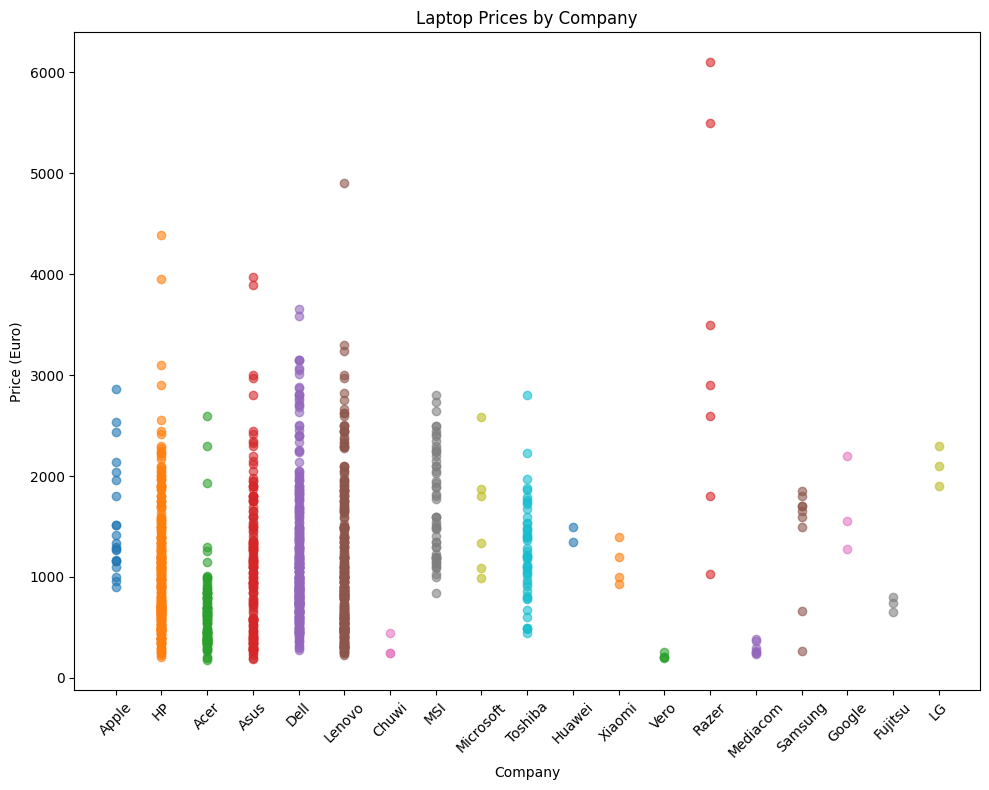

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data using pandas.
data = pd.read_csv('laptop_price - dataset.csv')

# Scatter plot: prices vs. manufacturers.
plt.figure(figsize=(10, 8))
for Company in data['Company'].unique():
    subset = data[data['Company'] == Company]
    plt.scatter([Company] * len(subset), subset['Price (Euro)'], alpha=0.6, label=Company)

# Calculate and print the average price of each company in order.
average_prices = data.groupby('Company')['Price (Euro)'].mean().sort_values()
print("The average price by company:\n", average_prices)
print("\n")

# Find and print the company with the most expansive average price.
most_expansive_average = average_prices.max()
most_expansive_company = average_prices.idxmax()

print("The company with the most expansive average price:",
    most_expansive_company, "at:", most_expansive_average, "Euro", "\n")

# Plot the results.
plt.title('Laptop Prices by Company')
plt.xlabel('Company')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I predict that the more RAM a computer has the more expansive it will be.

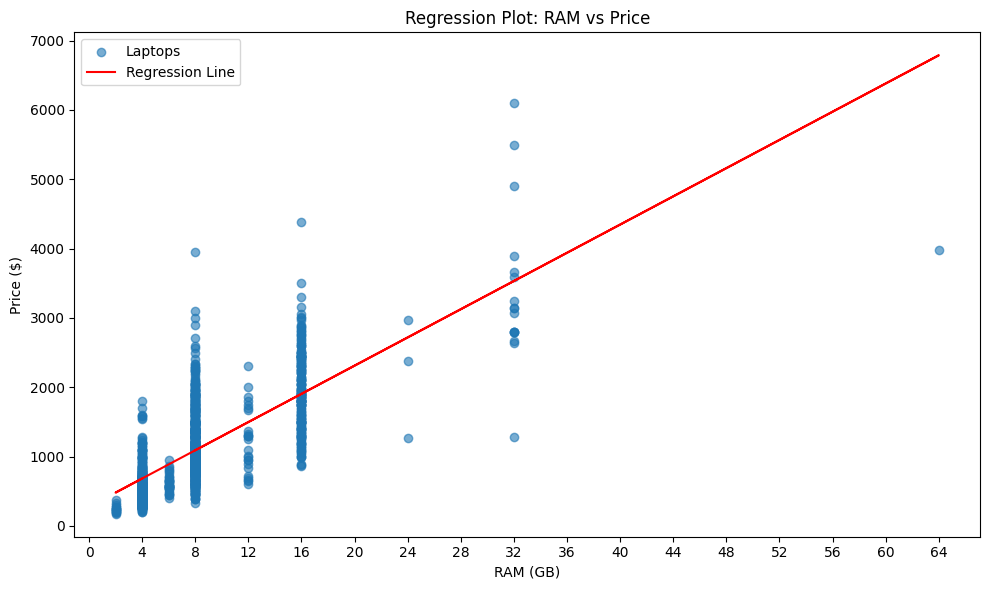

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('laptop_price - dataset.csv')

x = data['RAM (GB)']
y = data['Price (Euro)']

# Perform linear regression using NumPy
coefficients = np.polyfit(x, y, deg=1)
regression_line = np.poly1d(coefficients)

# Generate predicted values
y_pred = regression_line(x)

# Plot data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Laptops')
plt.plot(x, y_pred, color='red', label='Regression Line')

# Customize x-axis to show multiples of 4, best fitting for GB
plt.xticks(np.arange(0, x.max() + 1, 4))

# Plot the results
plt.title('Regression Plot: RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

Find different operating systems, make ones that are written differently uniform.

In [ ]:
import pandas as pd

# Load the dataset.
data = pd.read_csv('laptop_price - dataset.csv')

# Define a mapping dictionary for OS names.
os_mapping = {
    'Windows': ['Windows 10', 'Windows 7', 'Windows 10 S'],
    'MacOS': ['MacOS', 'Mac OS X', 'macOS'],
    'Linux': ['Linux'],
    'No OS': ['No OS'],
    'Android': ['Android'],
    'Chrome OS': ['Chrome OS']
}

# Normalize OS names
def map_os(os_name):
    for key, values in os_mapping.items():
        if os_name in values:
            return key
    return 'Other'

data['normalized_OS'] = data['OpSys'].apply(map_os)

# Separate data by normalized OS
windows_laptops = data[data['normalized_OS'] == 'Windows']
macos_laptops = data[data['normalized_OS'] == 'MacOS']
linux_laptops = data[data['normalized_OS'] == 'Linux']
no_os_laptops = data[data['normalized_OS'] == 'No OS']
android_laptops = data[data['normalized_OS'] == 'Android']
chrome_laptops = data[data['normalized_OS'] == 'Chrome OS']

# For manual addition of unique names: Get all 'Other' OS names
other_laptops = data[data['normalized_OS'] == 'Other']

# Print unique 'Other' OS names for manual addition
print("'Other' OS names:")
print(other_laptops['OpSys'].unique())

# Plot a distribution curve for the prices of each operating OS.



Unique 'Other' OS names:
[]


Plot price distribution for each operating system.

Creating new column "Memory".

### Bonus question ###

Additional questions for the dataset:
1. Does the amount of RAM memory correlate with drive space in each computer?
    Regression plot for RAM vs drive space.
    Calculate regression coefficient (r^2) to determine the degree of correlation.

2. On average, does Nvidia graphic cards support higher resolution displays than Intel graphic cards?
    Scatter plot with resolution on the X axis, and frequency on the Y axis with red/blue dots for eaach company respectively.
    Extract the resolution for each company and compare the averages.

3. Does bigger screen size in inches correlate with higher resolution display?
    Regression plot of screen size on the X axis and resolution on the Y axis.
    Calculate regression coefficient (r^2) to determine the degree of correlation.

4. Does 'No OS' computers tend to be cheaper than ones with OS preinstalled?
    Extract both sets as 'OS' vs 'No Os' and copare the average price.

5. Which Operating system is by average more expansive to have pre-installed?
    compare average price of each set of OS's.
    Not ideal because For best the results I Need to compare two identical computers for each OS group, once installed and once without.

6. Are Ultrabooks lighter on average than Notebooks which in turn are lighter than Gaming laptops?
    Compare average weight of the three groups.

7. Which CPU models have the highest clock speed?
    Create an ordered set with each type of processor and it's corresponding clock speed (in their own set)
    (even better if used with NumPy To save computational resources).

8. Which CPU company has the highest average/absolute clock speed?
    Compare averages of each company set clock speeds, and compare the .max of each to find the absolute one.

9. Which TypeName is most likely to have both SSD + HDD drives?
    Sift through the list appending all computers that have both SSD and HDD to a new list,
    Then group by TypeName.  


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/nb/dkf_lr4s16gc637vh_y3vzv40000gn/T/ipykernel_54506/3901466356.py:25: RuntimeWarning: invalid value encountered in scalar divide
  m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
/var/folders/nb/dkf_lr4s16gc637vh_y3vzv40000gn/T/ipykernel_54506/3901466356.py:34: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1 - (ss_residual / ss_total)


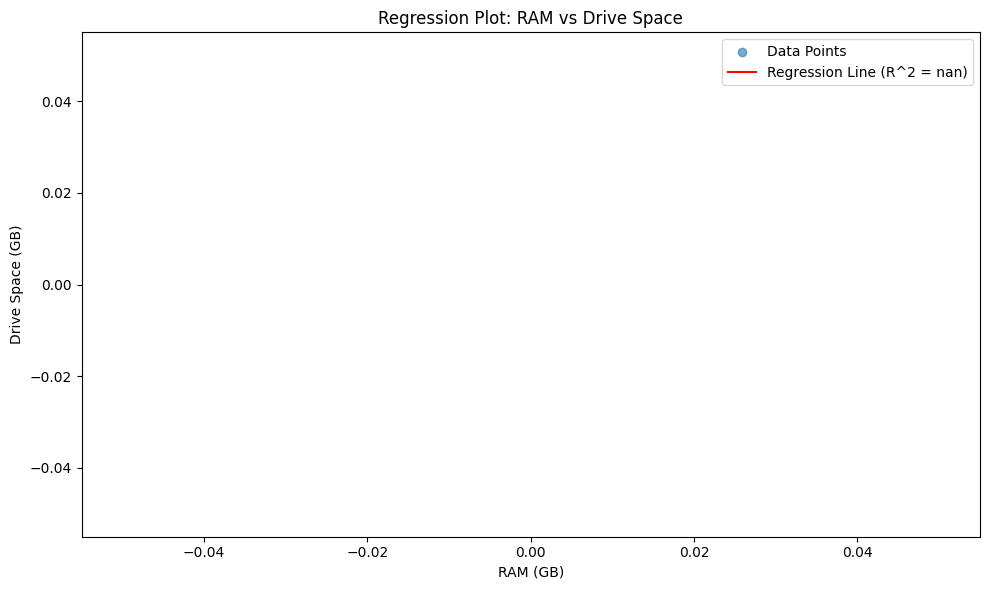

In [ ]:
# Idea number 1.



# np.corrcoef()




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('laptop_price - dataset.csv')

# Ensure RAM and Memory columns are numeric
data['RAM (GB)'] = pd.to_numeric(data['RAM (GB)'], errors='coerce')
data['Memory'] = pd.to_numeric(data['Memory'], errors='coerce')

# Drop rows with missing or invalid data
data = data.dropna(subset=['RAM (GB)', 'Memory'])

# Extract RAM and Memory columns
X = data['RAM (GB)'].values  # Independent variable (RAM)
y = data['Memory'].values  # Dependent variable (Drive Space)

# Perform linear regression using NumPy
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the slope (m) and intercept (c)
m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
c = y_mean - m * X

# Generate predicted values
y_pred = m * X + c

# Calculate R^2
ss_total = np.sum((y - y_mean)**2)  # Total sum of squares
ss_residual = np.sum((y - y_pred)**2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)

# Plot the regression plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Regression Line (R^2 = {r2:.4f})')

# Customize the plot
plt.title('Regression Plot: RAM vs Drive Space')
plt.xlabel('RAM (GB)')
plt.ylabel('Drive Space (GB)')
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('ram_vs_drive_space_regression.png', format='png')
plt.show()



In [ ]:
# Idea number 4.
